## Data extraction and preparation

In [45]:
#Importing different libraries for:
#Data preparation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [46]:
#NHANES demographic data
sas_demo = pd.read_sas("DEMO_J.XPT")
#Demographics sunset needed
sas_demo_subset = sas_demo[["SEQN","RIDSTATR","RIAGENDR","RIDAGEYR","RIDRETH3","DMDMARTL"]]
#Renaming the columns(Label Encoding)
sas_demo_subset.rename(columns = {"RIAGENDR": "Gender",
                                 "RIDAGEYR": "Age",
                                 "RIDRETH3": "Race",
                                 "DMDMARTL": "Marital_status"}, inplace = True)
sas_demo_subset.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,RIDSTATR,Gender,Age,Race,Marital_status
0,93703.0,2.0,2.0,2.0,6.0,NaN
1,93704.0,2.0,1.0,2.0,3.0,NaN
2,93705.0,2.0,2.0,66.0,4.0,3.0
3,93706.0,2.0,1.0,18.0,6.0,NaN
4,93707.0,2.0,1.0,13.0,7.0,NaN


In [47]:
#Medical Condition 
sas_med_con = pd.read_sas("Medical_condition.XPT")
#Extracting and renaming the stroke column
sas_stroke = sas_med_con[["SEQN","MCQ160C", "MCQ160F"]]
sas_stroke.rename(columns = {"MCQ160F": "Stroke",
                            "MCQ160C": "Heart_disease"}, inplace = True)
sas_stroke.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,Heart_disease,Stroke
0,93703.0,NaN,NaN
1,93704.0,NaN,NaN
2,93705.0,2.0,2.0
3,93706.0,NaN,NaN
4,93707.0,NaN,NaN


In [48]:
sas_smoke_cig = pd.read_sas("Smoked_cigarettes.XPT")
#Extracting the number of cigarettes smoked column
sas_smoked = sas_smoke_cig[['SEQN',"SMQ621","SMQ040"]]
sas_smoked.rename(columns = {"SMQ621": "No_of_cigarettes",
                            "SMQ040": "Still_smoke"}, inplace = True)
sas_smoked.head(10)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,No_of_cigarettes,Still_smoke
0,93705.0,NaN,3.0
1,93706.0,NaN,NaN
2,93707.0,1.0,NaN
3,93708.0,NaN,NaN
4,93709.0,NaN,1.0
5,93711.0,NaN,NaN
6,93712.0,NaN,2.0
7,93713.0,NaN,1.0
8,93714.0,NaN,3.0
9,93715.0,NaN,1.0


In [49]:
sas_alcohol_use = pd.read_sas("Alcohol.XPT")
#Extracting the number of cigarettes smoked column
sas_alcohol = sas_alcohol_use[['SEQN',"ALQ121"]]
sas_alcohol.rename(columns = {"ALQ121": "Alcohol_intake(one_year)"}, inplace = True)
sas_alcohol.head(10)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,Alcohol_intake(one_year)
0,93705.0,7.000000e+00
1,93706.0,NaN
2,93708.0,NaN
3,93709.0,NaN
4,93711.0,5.000000e+00
5,93712.0,5.397605e-79
6,93713.0,6.000000e+00
7,93714.0,9.000000e+00
8,93715.0,5.397605e-79
9,93716.0,7.000000e+00


In [50]:
sas_blood_pres = pd.read_sas("Blood_pressure.XPT")
#Extracting blood pressure and cholesterol level from the dataset
sas_blood_col = sas_blood_pres[["SEQN","BPQ020","BPQ080"]]
#Renaming the columns
sas_blood_col.rename(columns = {"BPQ020": "High_BP",
                               "BPQ080": "High_col"}, inplace = True)      
sas_blood_col.head(10)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,High_BP,High_col
0,93705.0,1.0,2.0
1,93706.0,2.0,2.0
2,93708.0,1.0,1.0
3,93709.0,1.0,2.0
4,93711.0,2.0,1.0
5,93712.0,2.0,2.0
6,93713.0,2.0,2.0
7,93714.0,2.0,1.0
8,93715.0,2.0,1.0
9,93716.0,2.0,2.0


In [51]:
sas_diabetes = pd.read_sas("DIQ_J.XPT")
#Extracting diabetes pressure and cholesterol level from the dataset
sas_diabetes_col = sas_diabetes[["SEQN","DIQ010"]]
#Renaming the columns
sas_diabetes_col.rename(columns = {"DIQ010": "Diabetes"}, inplace = True) 
sas_diabetes_col.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,Diabetes
0,93703.0,2.0
1,93704.0,2.0
2,93705.0,2.0
3,93706.0,2.0
4,93707.0,2.0


In [52]:
sas_sleep = pd.read_sas("Sleeping_habits.XPT")
#Extracting sleep habits from the dataset
sas_sleep_col = sas_sleep[["SEQN","SLQ050"]]
#Renaming the columns
sas_sleep_col.rename(columns = {"SLQ050": "Sleep"}, inplace = True) 
sas_sleep_col.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,Sleep
0,93705.0,2.0
1,93706.0,2.0
2,93708.0,2.0
3,93709.0,2.0
4,93711.0,1.0


In [53]:
sas_exercise = pd.read_sas("Physical_activity.XPT")
#Extracting exercise habits from the dataset
sas_exercise_col = sas_exercise[["SEQN","PAQ650"]]
#Renaming the columns
sas_exercise_col.rename(columns = {"PAQ650": "Exercise"}, inplace = True) 
sas_exercise_col.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,SEQN,Exercise
0,93705.0,2.0
1,93706.0,2.0
2,93708.0,2.0
3,93709.0,2.0
4,93711.0,1.0


In [54]:
#Merging the dataset for the habits of a patient by sequence number
habits = pd.merge(sas_smoked,sas_alcohol, on = "SEQN",how = "inner").merge(
    sas_exercise_col,on = "SEQN",how = "inner").merge(sas_sleep_col, on = "SEQN",how = "inner")
habits.head()

,SEQN,No_of_cigarettes,Still_smoke,Alcohol_intake(one_year),Exercise,Sleep
0,93705.0,NaN,3.0,7.0,2.0,2.0
1,93706.0,NaN,NaN,NaN,2.0,2.0
2,93708.0,NaN,NaN,NaN,2.0,2.0
3,93709.0,NaN,1.0,NaN,2.0,2.0
4,93711.0,NaN,NaN,5.0,1.0,1.0


In [55]:
#Merging the health issues of a patient by sequence number
health_issues =  pd.merge(sas_blood_col,sas_diabetes_col, on = "SEQN",how = "inner").merge(
    sas_stroke,on = "SEQN",how = "inner")
health_issues.head()

,SEQN,High_BP,High_col,Diabetes,Heart_disease,Stroke
0,93705.0,1.0,2.0,2.0,2.0,2.0
1,93706.0,2.0,2.0,2.0,NaN,NaN
2,93708.0,1.0,1.0,3.0,2.0,2.0
3,93709.0,1.0,2.0,2.0,2.0,1.0
4,93711.0,2.0,1.0,2.0,2.0,2.0


In [56]:
#Creating the stroke dataset by merging all the other demographics, health_issues and habits dataset on sequence column
stroke_data = pd.merge(sas_demo_subset,habits,on = "SEQN",how = "inner").merge(health_issues, on = "SEQN",how = "inner")
stroke_data.drop(columns = "RIDSTATR", inplace = True)
stroke_data.head()

,SEQN,Gender,Age,Race,Marital_status,No_of_cigarettes,Still_smoke,Alcohol_intake(one_year),Exercise,Sleep,High_BP,High_col,Diabetes,Heart_disease,Stroke
0,93705.0,2.0,66.0,4.0,3.0,NaN,3.0,7.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1,93706.0,1.0,18.0,6.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,93708.0,2.0,66.0,6.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,2.0
3,93709.0,2.0,75.0,4.0,2.0,NaN,1.0,NaN,2.0,2.0,1.0,2.0,2.0,2.0,1.0
4,93711.0,1.0,56.0,6.0,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [57]:
#Dropping unwanted columns
stroke_data.drop(columns ="No_of_cigarettes",inplace = True)
#narrowing the dataset to subjects between age 18 and above
stroke_data = stroke_data[stroke_data["Age"] > 17]
#selecting subjects that were examined at home and in the examination centre
stroke_data = stroke_data[stroke_data["Still_smoke"] <= 3.0]

In [58]:
stroke_data["Stroke"].dropna(inplace = True)
stroke_data = stroke_data[stroke_data["Stroke"]!=9.0]
stroke_data.head()

,SEQN,Gender,Age,Race,Marital_status,Still_smoke,Alcohol_intake(one_year),Exercise,Sleep,High_BP,High_col,Diabetes,Heart_disease,Stroke
0,93705.0,2.0,66.0,4.0,3.0,3.0,7.000000e+00,2.0,2.0,1.0,2.0,2.0,2.0,2.0
3,93709.0,2.0,75.0,4.0,2.0,1.0,NaN,2.0,2.0,1.0,2.0,2.0,2.0,1.0
5,93712.0,1.0,18.0,1.0,NaN,2.0,5.397605e-79,1.0,2.0,2.0,2.0,2.0,NaN,NaN
6,93713.0,1.0,67.0,3.0,3.0,1.0,6.000000e+00,2.0,1.0,2.0,2.0,2.0,2.0,2.0
7,93714.0,2.0,54.0,4.0,1.0,3.0,9.000000e+00,2.0,1.0,2.0,1.0,1.0,2.0,2.0


<AxesSubplot:>

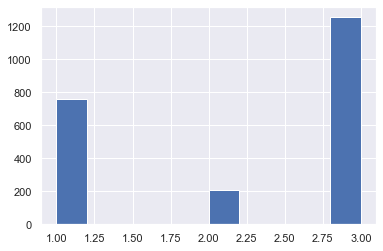

In [59]:
stroke_data["Still_smoke"].hist()

In [60]:
#Find the number of missing values in the dataset
stroke_data.isnull().sum()

SEQN                          0
Gender                        0
Age                           0
Race                          0
Marital_status               23
Still_smoke                   0
Alcohol_intake(one_year)    182
Exercise                      0
Sleep                         0
High_BP                       0
High_col                      0
Diabetes                      0
Heart_disease                23
Stroke                       23
dtype: int64

In [61]:
len(stroke_data)

2225

In [62]:
for col in stroke_data.columns:
    print(stroke_data[col].value_counts())

93705.0     1
99798.0     1
99782.0     1
99783.0     1
99785.0     1
           ..
96683.0     1
96679.0     1
96677.0     1
96672.0     1
102956.0    1
Name: SEQN, Length: 2225, dtype: int64
1.0    1361
2.0     864
Name: Gender, dtype: int64
80.0    178
60.0     65
63.0     64
61.0     61
64.0     56
       ... 
78.0     21
19.0     17
20.0     12
21.0     11
18.0      6
Name: Age, Length: 63, dtype: int64
3.0    960
4.0    533
1.0    253
2.0    168
6.0    156
7.0    155
Name: Race, dtype: int64
1.0     1001
5.0      350
3.0      322
6.0      240
2.0      200
4.0       88
77.0       1
Name: Marital_status, dtype: int64
3.0    1256
1.0     760
2.0     209
Name: Still_smoke, dtype: int64
5.397605e-79    512
6.000000e+00    241
1.000000e+01    183
9.000000e+00    172
4.000000e+00    162
5.000000e+00    151
3.000000e+00    150
7.000000e+00    141
8.000000e+00    135
1.000000e+00     98
2.000000e+00     95
7.700000e+01      2
9.900000e+01      1
Name: Alcohol_intake(one_year), dtype: int6

In [63]:
for col in stroke_data.columns:
    print(col)

SEQN
Gender
Age
Race
Marital_status
Still_smoke
Alcohol_intake(one_year)
Exercise
Sleep
High_BP
High_col
Diabetes
Heart_disease
Stroke


In [64]:
#Changing some of the encoding systems to fit the dataset 
stroke_data["High_BP"].replace(9,3,inplace = True)
stroke_data["Heart_disease"].replace(9,3,inplace = True)
stroke_data["Sleep"].replace(9,3,inplace = True)
stroke_data["High_col"].replace({7 : 3,
                                9 : 4},inplace = True)
stroke_data["Diabetes"].replace({7 : 3,
                                9 : 4},inplace = True)

stroke_data["Alcohol_intake(one_year)"].replace({77 : 11,
                                                99 : 12}, inplace = True)

stroke_data["Marital_status"].replace(77,7,inplace = True)
stroke_data["Stroke"].replace({1 : 0,
                                2 : 1},inplace = True)

In [65]:
for col in stroke_data.columns:
    print(stroke_data[col].value_counts())

93705.0     1
99798.0     1
99782.0     1
99783.0     1
99785.0     1
           ..
96683.0     1
96679.0     1
96677.0     1
96672.0     1
102956.0    1
Name: SEQN, Length: 2225, dtype: int64
1.0    1361
2.0     864
Name: Gender, dtype: int64
80.0    178
60.0     65
63.0     64
61.0     61
64.0     56
       ... 
78.0     21
19.0     17
20.0     12
21.0     11
18.0      6
Name: Age, Length: 63, dtype: int64
3.0    960
4.0    533
1.0    253
2.0    168
6.0    156
7.0    155
Name: Race, dtype: int64
1.0    1001
5.0     350
3.0     322
6.0     240
2.0     200
4.0      88
7.0       1
Name: Marital_status, dtype: int64
3.0    1256
1.0     760
2.0     209
Name: Still_smoke, dtype: int64
5.397605e-79    512
6.000000e+00    241
1.000000e+01    183
9.000000e+00    172
4.000000e+00    162
5.000000e+00    151
3.000000e+00    150
7.000000e+00    141
8.000000e+00    135
1.000000e+00     98
2.000000e+00     95
1.100000e+01      2
1.200000e+01      1
Name: Alcohol_intake(one_year), dtype: int64
2.0  

## Data Exploration

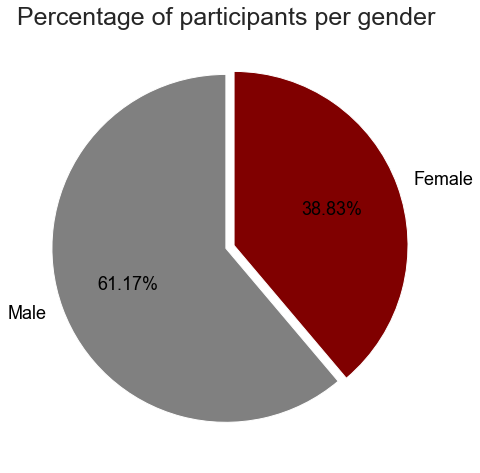

In [66]:
plt.figure(figsize = (8,8))
plt.pie([stroke_data["Gender"].value_counts()[1],stroke_data["Gender"].value_counts()[2]], 
        labels = ["Male","Female"],
       colors =["gray","maroon"],
       startangle = 90,
       autopct='%1.2f%%',
       explode = [0.0,0.05],
       textprops = dict(color ="black",size = 18))
plt.title("Percentage of participants per gender",
         fontdict = dict(size = 25))
plt.show()

In [71]:
#Checking for correlation between variables
corr = stroke_data.corr()
corr

,SEQN,Gender,Age,Race,Marital_status,Still_smoke,Alcohol_intake(one_year),Exercise,Sleep,High_BP,High_col,Diabetes,Heart_disease,Stroke
SEQN,1.000000,-0.001384,-0.026576,-0.007542,0.016954,-0.019618,0.007603,0.002117,-0.003855,-0.017699,0.009008,0.037428,-0.024530,0.008267
Gender,-0.001384,1.000000,-0.062272,-0.007686,0.065084,-0.053417,0.102497,0.078688,-0.105452,0.016653,-0.004304,0.048551,0.094121,-0.010701
Age,-0.026576,-0.062272,1.000000,0.011409,-0.378930,0.293657,-0.222640,0.252499,-0.059311,-0.378268,-0.304209,-0.214381,-0.202425,-0.179615
Race,-0.007542,-0.007686,0.011409,1.000000,-0.033005,-0.080456,0.025495,-0.013933,0.002247,-0.054406,0.007007,-0.001931,0.041745,-0.075936
Marital_status,0.016954,0.065084,-0.378930,-0.033005,1.000000,-0.248880,0.038644,-0.051476,-0.007448,0.123312,0.179458,0.096011,0.090231,0.055134
Still_smoke,-0.019618,-0.053417,0.293657,-0.080456,-0.248880,1.000000,-0.051641,-0.062669,0.008436,-0.124523,-0.169154,-0.103262,-0.092795,0.011936
Alcohol_intake(one_year),0.007603,0.102497,-0.222640,0.025495,0.038644,-0.051641,1.000000,-0.077232,0.008070,0.060808,0.050458,0.061064,0.074328,0.054309
Exercise,0.002117,0.078688,0.252499,-0.013933,-0.051476,-0.062669,-0.077232,1.000000,-0.063213,-0.141936,-0.078386,-0.104915,-0.036994,-0.086191
Sleep,-0.003855,-0.105452,-0.059311,0.002247,-0.007448,0.008436,0.008070,-0.063213,1.000000,0.199635,0.107911,0.113640,0.064319,0.040632
High_BP,-0.017699,0.016653,-0.378268,-0.054406,0.123312,-0.124523,0.060808,-0.141936,0.199635,1.000000,0.244272,0.234894,0.167728,0.157200


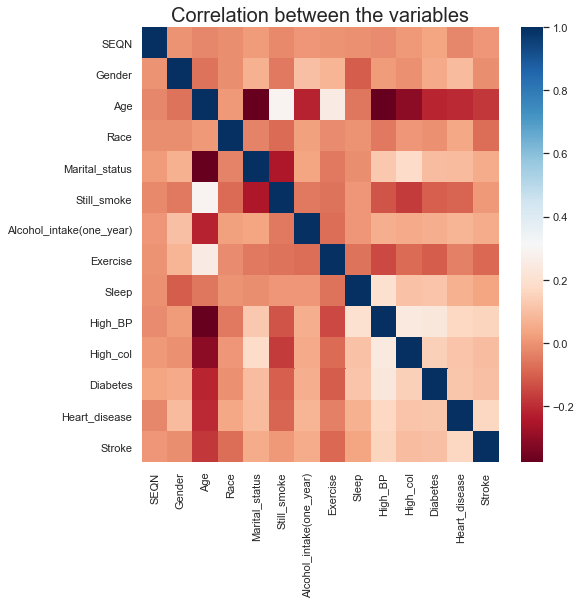

In [76]:
plt.figure(figsize = (8,8))
plt.title("Correlation between the variables",
         fontdict = dict(size = 20))
sns.heatmap(corr,
           cmap = "RdBu")
plt.show()

## Data preprocessing

In [100]:
#dependent variable
y = stroke_data["Stroke"]
#independent variables
X = stroke_data[["Gender","Age","Race","Marital_status","Still_smoke","Alcohol_intake(one_year)","Exercise","Sleep","High_BP","High_col","Diabetes","Heart_disease"]]

In [109]:
#normalization of the independent variables
scaler = StandardScaler()
norm = scaler.fit_transform(X)
norm[0:5]


array([[ 1.25508226,  0.70883795,  0.37593901,  0.16809662,  0.83971782,
         0.73535524,  0.46101416,  0.74124783, -1.12416239,  0.67745169,
         0.35595626,  0.2449595 ],
       [ 1.25508226,  1.22552694,  0.37593901, -0.36835086, -1.32149925,
                nan,  0.46101416,  0.74124783, -1.12416239,  0.67745169,
         0.35595626,  0.2449595 ],
       [-0.79676052, -2.04683666, -1.5875922 ,         nan, -0.24089071,
        -1.273492  , -2.16913075,  0.74124783,  0.87046386,  0.67745169,
         0.35595626,         nan],
       [-0.79676052,  0.76624784, -0.27857139,  0.16809662, -1.32149925,
         0.44837706,  0.46101416, -1.34380453,  0.87046386,  0.67745169,
         0.35595626,  0.2449595 ],
       [ 1.25508226,  0.0199193 ,  0.37593901, -0.90479834,  0.83971782,
         1.30931159,  0.46101416, -1.34380453,  0.87046386, -1.17203298,
        -1.91991353,  0.2449595 ]])

In [110]:
#splitting the training and test sets
X_train,X_test,y_train,y_test = train_test_split(norm,y,test_size = 0.2,random_state = 45)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1780
445
1780
445


## Model creation